# Cleaning

In [237]:
nltk.download('punkt_tab')

!pip install scikit-learn
!pip install wordcloud
!pip install nltk

import pandas as pd
import csv
import nltk
import ssl
import re
import unidecode
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [122]:
# Loading Real News
Daily_1 = pd.read_csv('DailySignal.csv',encoding='cp1252')
Daily_2 = pd.read_csv('DailySignal2.csv',encoding='cp1252')
Vox_1 = pd.read_csv('Vox.csv',encoding='cp1252')
Vox_2 = pd.read_csv('Vox2.csv',encoding='cp1252')
Scripps = pd.read_csv('Scripps.csv',encoding='cp1252')

# Loading Fake News
Breitbart_1 = pd.read_csv('Breitbart.csv')
Breitbart_2 = pd.read_csv('Breitbart2.csv')
Info_1 =  pd.read_csv('InfoWars.csv')
Info_2 =  pd.read_csv('InfoWars2.csv')

# Appending
fakenews.append(Breitbart_1['text'])
fakenews.append(Breitbart_2['text'])
fakenews.append(Info_1['text'])
fakenews.append(Info_2['text'])

realnews.append(Daily_1['Article Text'])
realnews.append(Daily_2['Article Text'])
realnews.append(Vox_1['Article Text'])
realnews.append(Vox_2['Article Text'])
realnews.append(Scripps['text'])

In [123]:
# Importing Bitchute


Bit_1 = pd.read_csv('Bitchute_1.mp4.csv')
Bit_2 = pd.read_csv('Bitchute_2.mp4.csv')

Bitchute_1 = []
Bitchute_2 =[]

for i in range(len(Bit_1)):
    Bitchute_1.append(Bit_1['Text'][i])

for i in range(len(Bit_2)):
    Bitchute_2.append(Bit_2['Text'][i])


Bitchute_1 = "".join(Bitchute_1)
Bitchute_1

Bitchute_2 = "".join(Bitchute_2)
type(Bitchute_2)

str

In [124]:
# Creating new dataframe

my_df = {'title':[],'text':[],'class':[]}

# Adding Real News Titles
my_df['title'].append(Daily_1['Title'][0])
my_df['title'].append(Daily_2['Title'][0])
my_df['title'].append(Vox_1['Title'][0])
my_df['title'].append(Vox_2['Title'][0])
my_df['title'].append(Scripps['title'][0])
my_df['title'].append(Breitbart_1['title'][0])
my_df['title'].append(Breitbart_2['title'][0])
my_df['title'].append(Info_1['title'][0])
my_df['title'].append(Info_2['title'][0])
my_df['title'].append('BREAKING DOJ Set to Drop Cases Against Trump Before Inauguration')  # Bichute titles not in csv
my_df['title'].append('Kamala Harris Concedes to Trump, but with Passive Aggressive Dog Whistles throughout her Speech')

# Adding Text 
my_df['text'].append(Daily_1['Article Text'][0])
my_df['text'].append(Daily_2['Article Text'][0])
my_df['text'].append(Vox_1['Article Text'][0])
my_df['text'].append(Vox_2['Article Text'][0])
my_df['text'].append(Scripps['text'][0])
my_df['text'].append(Breitbart_1['text'][0])
my_df['text'].append(Breitbart_2['text'][0])
my_df['text'].append(Info_1['text'][0])
my_df['text'].append(Info_2['text'][0])
my_df['text'].append(Bitchute_1)
my_df['text'].append(Bitchute_2)

# Adding classes
my_df['class'].append(0)
my_df['class'].append(0)
my_df['class'].append(0)
my_df['class'].append(0)
my_df['class'].append(0)
my_df['class'].append(1)
my_df['class'].append(1)
my_df['class'].append(1)
my_df['class'].append(1)
my_df['class'].append(1)
my_df['class'].append(1)


results = pd.DataFrame(my_df)
results.to_csv('mydf.csv', index=True, index_label="Index",encoding="utf-8-sig")
print('Done')

Done


Does a Column Have an Empty Cell?
title    0
text     0
class    0
dtype: int64




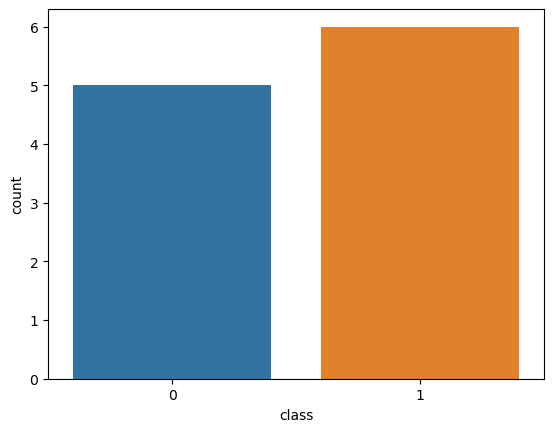

done


In [125]:
!pip install seaborn
!pip install Unidecode
!pip install matplotlib
!pip install nltk

import pandas
import seaborn as sns
import unidecode
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

input_dataframe = pandas.read_csv("mydf.csv", index_col=0)

# Check for null values in the dateset
count_empty_rows_in_columns = input_dataframe.isna().sum()
print("Does a Column Have an Empty Cell?")
print(count_empty_rows_in_columns)
print("\n")

# count unique values in the class column from the input dataframe
sns.countplot(x='class', data=input_dataframe)
plt.show()

text_list = input_dataframe["text"].tolist()

code_list = input_dataframe["class"].tolist()

# Cleaning the text
# convert text to lower case
textlist_lowercase = [i.lower() for i in text_list]

# remove special characters
textlist_lowercase_nospecial_characters = [re.sub(r"[^a-zA-Z]", " ", text) for text in textlist_lowercase]

# Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

textwithoutstopwords = []
for item in textlist_lowercase_nospecial_characters:
    string = ""
    for word in item.split(" "):
        if word.strip() in stopwords_list:
            continue
        else:
            string = string + " " + word
    textwithoutstopwords.append(string)

linksremoved = []
# Remove links
for text in textwithoutstopwords:
    remove_https = re.sub(r'http\S+', '', text)
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    linksremoved.append(remove_com)

# Remove special characters
cleanedtextwithoutlinks = [unidecode.unidecode(text) for text in linksremoved]

# Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+", " ", text) for text in cleanedtextwithoutlinks]

#print(len(cleantext))

output = {"CleanText": [], "Code": []}

for text in cleantext:
    output['CleanText'].append(text)

for code in code_list:
    output['Code'].append(code)

# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('cleanedtext.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")


In [126]:
my_df = pd.read_csv('cleanedtext.csv')
my_df

,Index,CleanText,Code
0,0,daily caller news foundation democratic strat...,0
1,1,biggest loser following tuesday astounding el...,0
2,2,support independent journalism matters become...,0
3,3,donald trump rode way comeback quintessential...,0
4,4,donald trump rode way comeback quintessential...,0
5,5,celebrities pundits influencers promised leav...,1
6,6,former president donald john trump winner pre...,1
7,7,msnbc news anchor chris hayes called deep sta...,1
8,8,vice president kamala harris officially conce...,1
9,9,mike man deep state elon game changer free sp...,1


In [127]:
real_df = my_df[my_df['Code']==0]
fake_df = my_df[my_df['Code']==1]

In [128]:
real_df

,Index,CleanText,Code
0,0,daily caller news foundation democratic strat...,0
1,1,biggest loser following tuesday astounding el...,0
2,2,support independent journalism matters become...,0
3,3,donald trump rode way comeback quintessential...,0
4,4,donald trump rode way comeback quintessential...,0


In [129]:
fake_df

,Index,CleanText,Code
5,5,celebrities pundits influencers promised leav...,1
6,6,former president donald john trump winner pre...,1
7,7,msnbc news anchor chris hayes called deep sta...,1
8,8,vice president kamala harris officially conce...,1
9,9,mike man deep state elon game changer free sp...,1
10,10,thank support visit u military news com watch...,1


In [130]:
fake_string = ""

for row in range(len(fake_df)):
    fake_string += fake_df['CleanText'][row+5]
    
fake_string

' celebrities pundits influencers promised leave united states donald trump election roger clemens holding word ever said leaving america trump wins let door hit way time cy young winner wrote x dawn new era lucroy wrote x blessing live wonderful country vote make changes every years silent majority spoke last night vehemently rejecting radical anti american policies socialist woke know weirdest thing side thinks okay sexualize children allow men woman sports bathrooms continued weird commenter said last night auto corrected nation people people went handled plague upon us said adding proud american today look forward watching trump elon rfk others clean swamp government trump enjoyed considerable support pro athletes election season ers star nick bosa crashed field interview display maga hat families chiefs qb patrick mahomes dolphins qb tua tagovailoa running back raheem mostert expressed support former soon president united states president trump way winning electoral votes smashed 

In [131]:
real_string = ""

for row in range(len(real_df)):
    #print(real_df['CleanText'][row])
    real_string += real_df['CleanText'][row]
    
    
real_string

' daily caller news foundation democratic strategist james carville wednesday outlined major missteps believes led vice president kamala harris loss former president donald trump trump clinched election victory early wednesday fueled partly stronger support hispanic black men carville james carville explains pointed president joe biden late july exit race harris failure distinguish sense disorder factors sunk presidential bid think couple big big mistakes something overreaching first biden staying late process carville said unused cordwood sitting sideline ok mean really good really good unused know kind open process would much better could worse sure could lot better harris secured enough backing democratic delegates become party presumptive nominee july despite receiving virtually primary voter approval separate biden killed democrats killed biden sense disorder part sense disorder unfortunate events would refer woke era added got beyond image stuck people minds democrats wanted defu

# Charts
Below are the codes for the respective charts. Analysis will be in the powerpoint. 

## Unigrams, Bigrams, Trigrams

Fake News
[(('trump',), 38), (('president',), 20), (('election',), 12), (('harris',), 11), (('news',), 11), (('donald',), 8), (('support',), 8), (('campaign',), 7)]
[(('donald', 'trump'), 7), (('vice', 'president'), 6), (('military', 'news'), 6), (('deep', 'state'), 4), (('monthly', 'supporter'), 4), (('support', 'click'), 4), (('website', 'military'), 4), (('former', 'president'), 3)]
[(('website', 'military', 'news'), 4), (('vice', 'president', 'kamala'), 2), (('president', 'kamala', 'harris'), 2), (('early', 'wednesday', 'morning'), 2), (('calling', 'democracy', 'elections'), 2), (('democracy', 'elections', 'hayes'), 2), (('ways', 'sunday', 'back'), 2), (('president', 'elect', 'donald'), 2)]


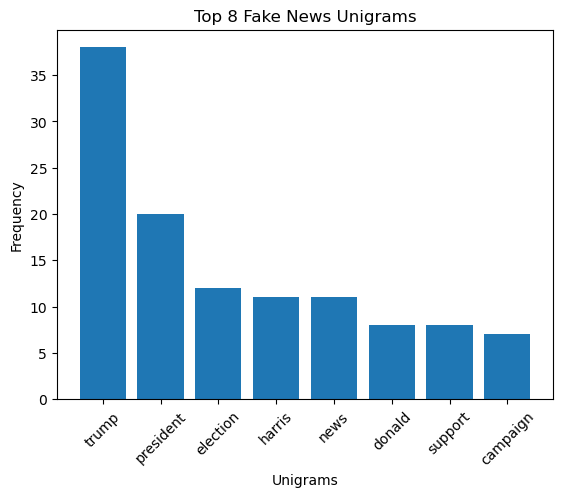

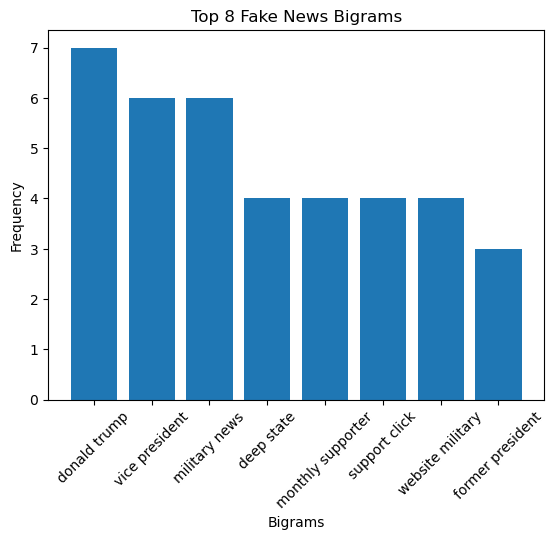

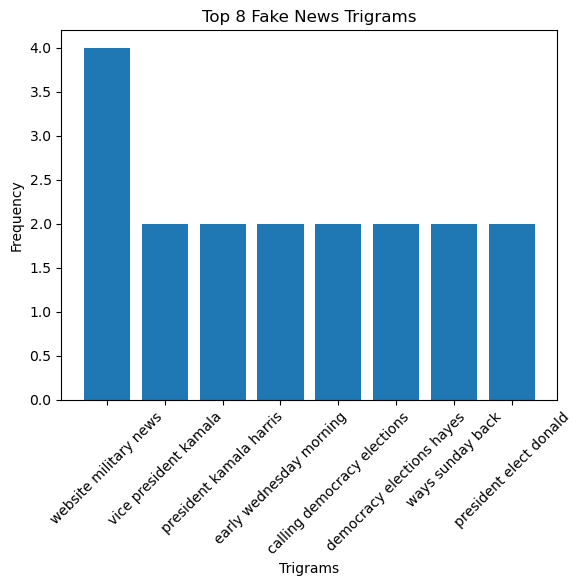

done


In [133]:
# For Fake News
subheader= 'Fake News'
print(subheader)

text_tokens = word_tokenize(fake_string)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

scripp = alphabet_list

unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title(f"Top 8 {subheader} Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title(f"Top 8 {subheader} Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title(f"Top 8 {subheader} Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()





print("done")

Real News
[(('trump',), 47), (('harris',), 25), (('media',), 21), (('president',), 14), (('biden',), 14), (('private',), 14), (('campaign',), 12), (('senate',), 12)]
[(('geo', 'group'), 12), (('legacy', 'media'), 8), (('senate', 'candidates'), 8), (('corporate', 'media'), 6), (('mass', 'deportation'), 6), (('private', 'prison'), 6), (('private', 'prisons'), 6), (('president', 'joe'), 5)]
[(('president', 'joe', 'biden'), 5), (('democratic', 'senate', 'candidates'), 4), (('contracts', 'private', 'prisons'), 4), (('daily', 'caller', 'news'), 2), (('caller', 'news', 'foundation'), 2), (('former', 'president', 'donald'), 2), (('president', 'donald', 'trump'), 2), (('wrong', 'track', 'country'), 2)]


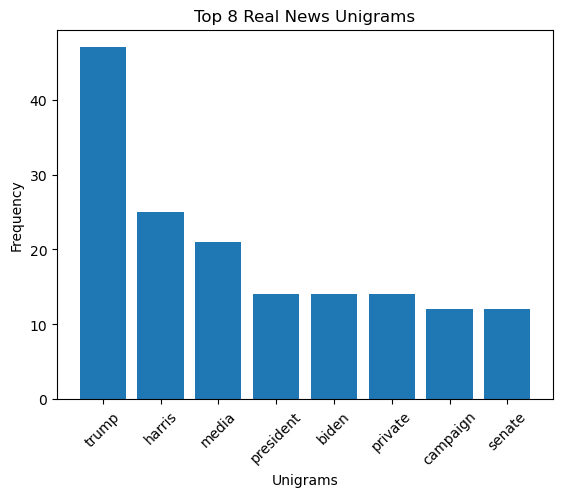

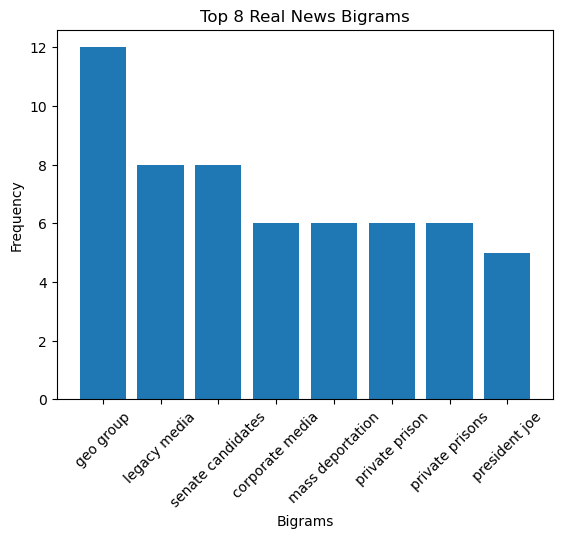

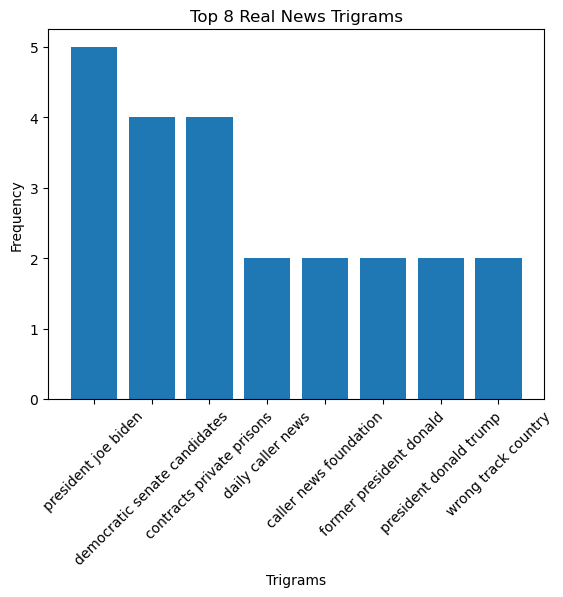

done


In [134]:
# For Fake News
subheader= 'Real News'
print(subheader)

text_tokens = word_tokenize(real_string)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

scripp = alphabet_list

unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title(f"Top 8 {subheader} Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title(f"Top 8 {subheader} Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title(f"Top 8 {subheader} Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()





print("done")

## Wordcloud

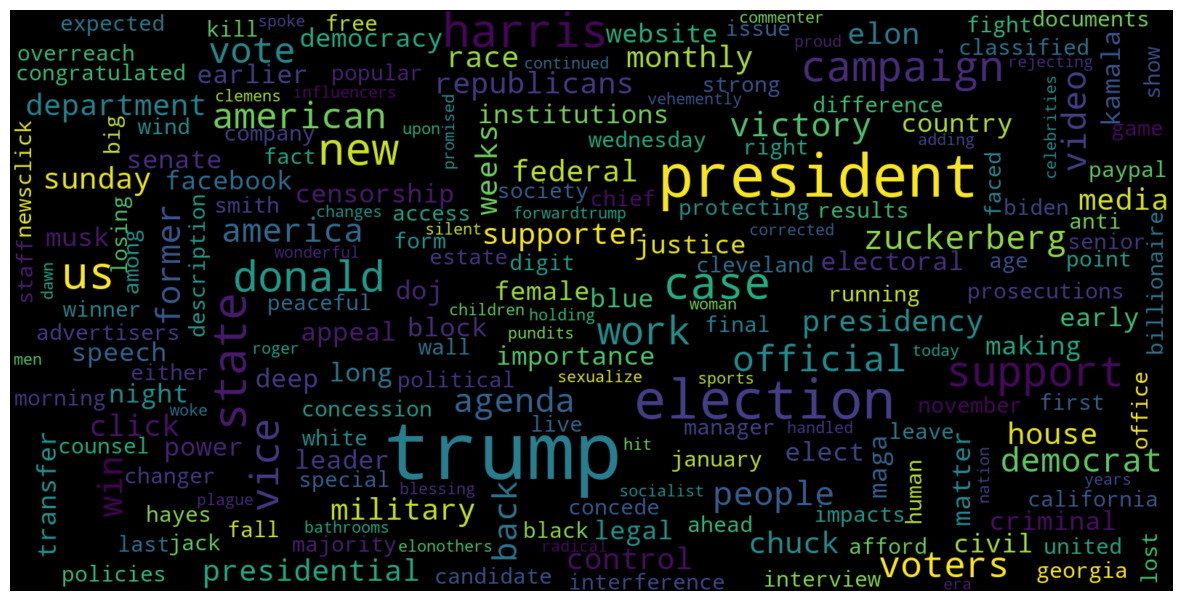

done


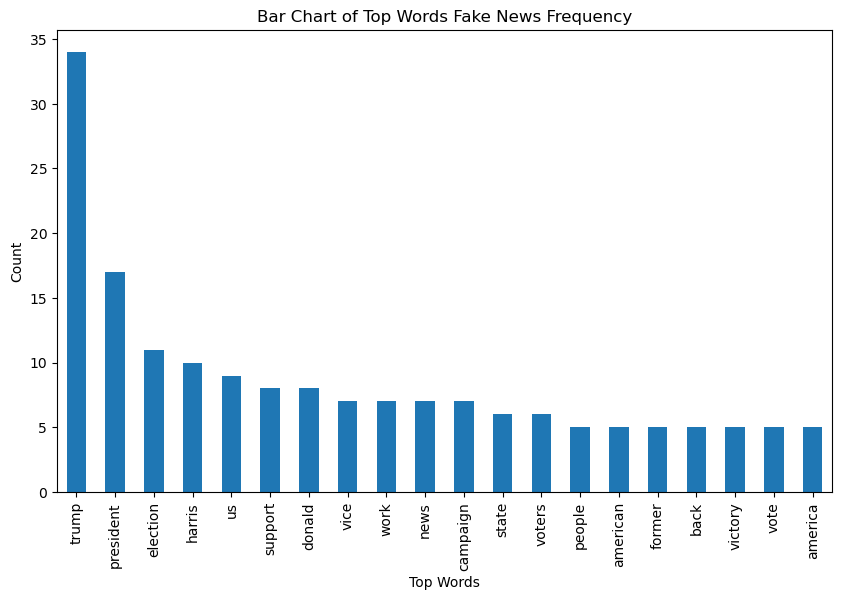

In [186]:
#I am converting dictionary to a list so I can analyze the data

textlist = []
for word in fake_df['CleanText']:
    textlist.append(word)

#This is how we can remove individual words that does not make sense from the wordcloud
import re
textlist = [re.sub(" u ","",text) for text in textlist]
textlist = [re.sub("could","",text) for text in textlist]
textlist = [re.sub("said","",text) for text in textlist]
textlist = [re.sub("one","",text) for text in textlist]
textlist = [re.sub("would","",text) for text in textlist]
textlist = [re.sub("also","",text) for text in textlist]
textlist = [re.sub("told","",text) for text in textlist]
textlist = [re.sub("two","",text) for text in textlist]
textlist = [re.sub("look","",text) for text in textlist]
textlist = [re.sub("began","",text) for text in textlist]
textlist = [re.sub("thing","",text) for text in textlist]
textlist = [re.sub("know","",text) for text in textlist]
textlist = [re.sub("went","",text) for text in textlist]
textlist = [re.sub("qb","",text) for text in textlist]
textlist = [re.sub("oh","",text) for text in textlist]
textlist = [re.sub("let","",text) for text in textlist]
textlist = [re.sub("seen","",text) for text in textlist]
textlist = [re.sub("phone","",text) for text in textlist]
textlist = [re.sub("calling","",text) for text in textlist]
textlist = [re.sub("talked","",text) for text in textlist]
textlist = [re.sub("really","",text) for text in textlist]
textlist = [re.sub("meant","",text) for text in textlist]
textlist = [re.sub(" th ","",text) for text in textlist]
textlist = [re.sub("make","",text) for text in textlist]
textlist = [re.sub("six","",text) for text in textlist]
textlist = [re.sub("whatever","",text) for text in textlist]
textlist = [re.sub("every","",text) for text in textlist]
textlist = [re.sub("become","",text) for text in textlist]
textlist = [re.sub("tell","",text) for text in textlist]
textlist = [re.sub("starts","",text) for text in textlist]
textlist = [re.sub("watch","",text) for text in textlist]
textlist = [re.sub("might","",text) for text in textlist]
textlist = [re.sub("days","",text) for text in textlist]
textlist = [re.sub("breitbart","",text) for text in textlist]
textlist = [re.sub("believe","",text) for text in textlist]
textlist = [re.sub("soon","",text) for text in textlist]
textlist = [re.sub("inigence","",text) for text in textlist]
textlist = [re.sub("may","",text) for text in textlist]
textlist = [re.sub("never","",text) for text in textlist]
textlist = [re.sub("even","",text) for text in textlist]
textlist = [re.sub("nbc","",text) for text in textlist]
textlist = [re.sub("many","",text) for text in textlist]
textlist = [re.sub("chris","",text) for text in textlist]
textlist = [re.sub("wrote","",text) for text in textlist]
textlist = [re.sub("fourth","",text) for text in textlist]
textlist = [re.sub("call","",text) for text in textlist]
textlist = [re.sub("possible","",text) for text in textlist]
textlist = [re.sub("think","",text) for text in textlist]
textlist = [re.sub("way","",text) for text in textlist]
textlist = [re.sub("still","",text) for text in textlist]
textlist = [re.sub("shown","",text) for text in textlist]
textlist = [re.sub("showing","",text) for text in textlist]
textlist = [re.sub(" s ","",text) for text in textlist]
textlist = [re.sub(" ed ","",text) for text in textlist]
textlist = [re.sub(" ms ","",text) for text in textlist]
textlist = [re.sub("keep","",text) for text in textlist]
textlist = [re.sub("suppose","",text) for text in textlist]
textlist = [re.sub("door","",text) for text in textlist]
textlist = [re.sub("come","",text) for text in textlist]
textlist = [re.sub("took","",text) for text in textlist]
textlist = [re.sub("take","",text) for text in textlist]
textlist = [re.sub("leaving","",text) for text in textlist]
textlist = [re.sub("say","",text) for text in textlist]
textlist = [re.sub(" ing ","",text) for text in textlist]
textlist = [re.sub(" n ","",text) for text in textlist]
textlist = [re.sub(" ph ","",text) for text in textlist]
textlist = [re.sub(" s ","",text) for text in textlist]
textlist = [re.sub(" cy ","",text) for text in textlist]
textlist = [re.sub(" x ","",text) for text in textlist]
textlist = [re.sub("sideokay","",text) for text in textlist]
textlist = [re.sub("timeyoung","",text) for text in textlist]
textlist = [re.sub("lucroy","",text) for text in textlist]
textlist = [re.sub(" com ","",text) for text in textlist]
textlist = [re.sub("set","",text) for text in textlist]
textlist = [re.sub("allow","",text) for text in textlist]
textlist = [re.sub("double","",text) for text in textlist]
textlist = [re.sub("word","",text) for text in textlist]
textlist = [re.sub("well","",text) for text in textlist]
textlist = [re.sub("latest","",text) for text in textlist]
textlist = [re.sub("getting","",text) for text in textlist]
textlist = [re.sub("without","",text) for text in textlist]
textlist = [re.sub("gave","",text) for text in textlist]
textlist = [re.sub("fill","",text) for text in textlist]
textlist = [re.sub("auto","",text) for text in textlist]
textlist = [re.sub("weird","",text) for text in textlist]
textlist = [re.sub("closely","",text) for text in textlist]
textlist = [re.sub(" est ","",text) for text in textlist]
textlist = [re.sub(" rfk ","",text) for text in textlist]



#Draw a word cloud diagram to verify the input data
consolidated = ' '.join(
    word for word in textlist)
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

#Draw a bar chart demonstrating top 20 words from the cleaned text for verification 
vec = CountVectorizer().fit(textlist) 
bag_of_words = vec.transform(textlist) 
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) 
    
common_words = words_freq[:20] 

topwordsdataframe = pandas.DataFrame(common_words, columns=['Review', 'count']) 
  
topwordsdataframe.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Fake News Frequency"
) 


###
inputdata = fake_df.to_dict(orient='dict')
output = {"CleanText": [], "Code": []}

#I created a new dictionary below for the Text column in the csv file
codedictionary = inputdata.get("Code")

#I am converting dictionary to a list so I can analyze the data
codelist = list(codedictionary.values())

for text in textlist:
    output['CleanText'].append(text)

for code in codelist:
    output['Code'].append(code)

# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('cleanedtext2_fake.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")

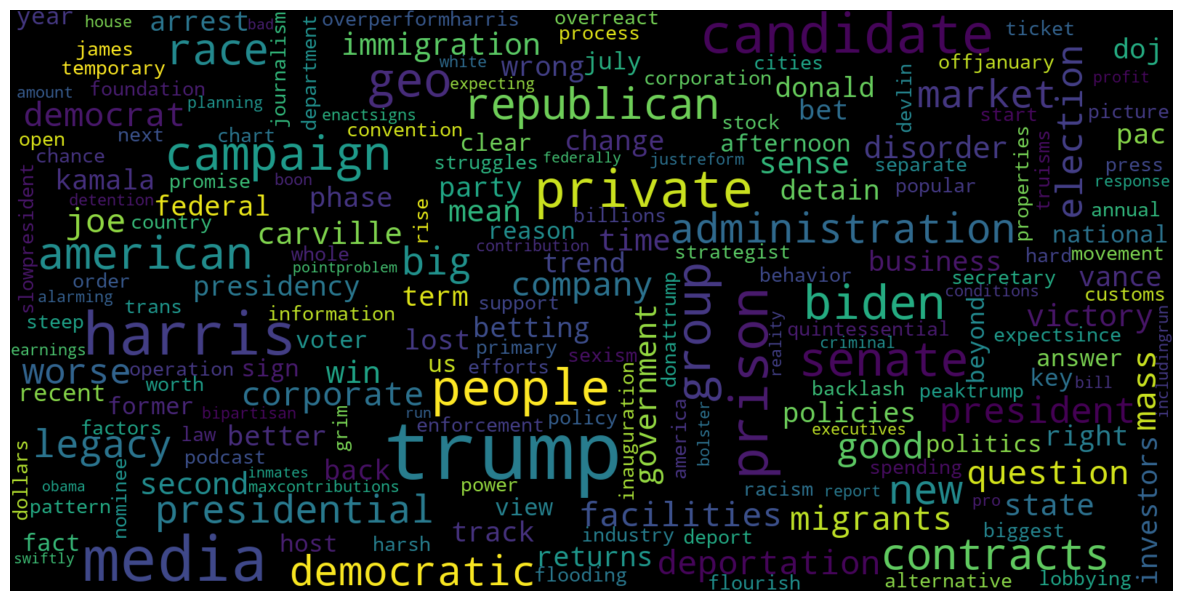

done


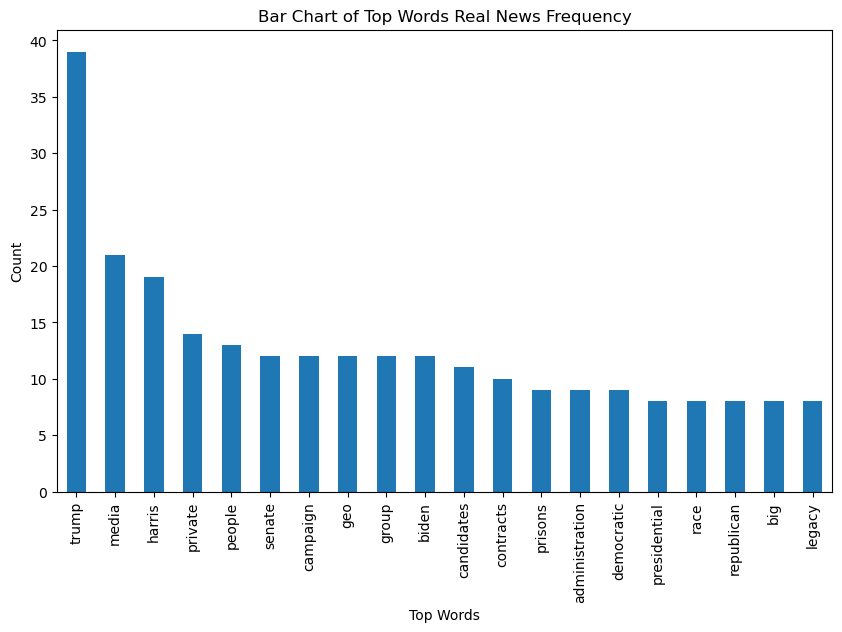

In [336]:
#I am converting dictionary to a list so I can analyze the data

textlist = []
for word in real_df['CleanText']:
    textlist.append(word)

#This is how we can remove individual words that does not make sense from the wordcloud
import re
textlist = [re.sub(" u ","",text) for text in textlist]
textlist = [re.sub("could","",text) for text in textlist]
textlist = [re.sub("said","",text) for text in textlist]
textlist = [re.sub("one","",text) for text in textlist]
textlist = [re.sub("would","",text) for text in textlist]
textlist = [re.sub("also","",text) for text in textlist]
textlist = [re.sub("told","",text) for text in textlist]
textlist = [re.sub("two","",text) for text in textlist]
textlist = [re.sub("look","",text) for text in textlist]
textlist = [re.sub("began","",text) for text in textlist]
textlist = [re.sub("thing","",text) for text in textlist]
textlist = [re.sub("know","",text) for text in textlist]
textlist = [re.sub("went","",text) for text in textlist]
textlist = [re.sub("qb","",text) for text in textlist]
textlist = [re.sub("oh","",text) for text in textlist]
textlist = [re.sub("let","",text) for text in textlist]
textlist = [re.sub("seen","",text) for text in textlist]
textlist = [re.sub("phone","",text) for text in textlist]
textlist = [re.sub("calling","",text) for text in textlist]
textlist = [re.sub("talked","",text) for text in textlist]
textlist = [re.sub("really","",text) for text in textlist]
textlist = [re.sub("meant","",text) for text in textlist]
textlist = [re.sub(" th ","",text) for text in textlist]
textlist = [re.sub("make","",text) for text in textlist]
textlist = [re.sub("six","",text) for text in textlist]
textlist = [re.sub("whatever","",text) for text in textlist]
textlist = [re.sub("every","",text) for text in textlist]
textlist = [re.sub("become","",text) for text in textlist]
textlist = [re.sub("tell","",text) for text in textlist]
textlist = [re.sub("starts","",text) for text in textlist]
textlist = [re.sub("watch","",text) for text in textlist]
textlist = [re.sub("might","",text) for text in textlist]
textlist = [re.sub("days","",text) for text in textlist]
textlist = [re.sub("breitbart","",text) for text in textlist]
textlist = [re.sub("believe","",text) for text in textlist]
textlist = [re.sub("soon","",text) for text in textlist]
textlist = [re.sub("inigence","",text) for text in textlist]
textlist = [re.sub("may","",text) for text in textlist]
textlist = [re.sub("never","",text) for text in textlist]
textlist = [re.sub("even","",text) for text in textlist]
textlist = [re.sub("nbc","",text) for text in textlist]
textlist = [re.sub("many","",text) for text in textlist]
textlist = [re.sub("chris","",text) for text in textlist]
textlist = [re.sub("wrote","",text) for text in textlist]
textlist = [re.sub("fourth","",text) for text in textlist]
textlist = [re.sub("call","",text) for text in textlist]
textlist = [re.sub("possible","",text) for text in textlist]
textlist = [re.sub("think","",text) for text in textlist]
textlist = [re.sub("way","",text) for text in textlist]
textlist = [re.sub("still","",text) for text in textlist]
textlist = [re.sub("shown","",text) for text in textlist]
textlist = [re.sub("showing","",text) for text in textlist]
textlist = [re.sub(" s ","",text) for text in textlist]
textlist = [re.sub(" ed ","",text) for text in textlist]
textlist = [re.sub(" ms ","",text) for text in textlist]
textlist = [re.sub("keep","",text) for text in textlist]
textlist = [re.sub("suppose","",text) for text in textlist]
textlist = [re.sub("door","",text) for text in textlist]
textlist = [re.sub("come","",text) for text in textlist]
textlist = [re.sub("took","",text) for text in textlist]
textlist = [re.sub("take","",text) for text in textlist]
textlist = [re.sub("leaving","",text) for text in textlist]
textlist = [re.sub("say","",text) for text in textlist]
textlist = [re.sub(" ing ","",text) for text in textlist]
textlist = [re.sub(" n ","",text) for text in textlist]
textlist = [re.sub(" ph ","",text) for text in textlist]
textlist = [re.sub(" s ","",text) for text in textlist]
textlist = [re.sub(" cy ","",text) for text in textlist]
textlist = [re.sub(" x ","",text) for text in textlist]
textlist = [re.sub("sideokay","",text) for text in textlist]
textlist = [re.sub("timeyoung","",text) for text in textlist]
textlist = [re.sub("lucroy","",text) for text in textlist]
textlist = [re.sub(" com ","",text) for text in textlist]
textlist = [re.sub("set","",text) for text in textlist]
textlist = [re.sub("allow","",text) for text in textlist]
textlist = [re.sub("double","",text) for text in textlist]
textlist = [re.sub("word","",text) for text in textlist]
textlist = [re.sub("well","",text) for text in textlist]
textlist = [re.sub("latest","",text) for text in textlist]
textlist = [re.sub("getting","",text) for text in textlist]
textlist = [re.sub("without","",text) for text in textlist]
textlist = [re.sub("gave","",text) for text in textlist]
textlist = [re.sub("fill","",text) for text in textlist]
textlist = [re.sub("auto","",text) for text in textlist]
textlist = [re.sub("weird","",text) for text in textlist]
textlist = [re.sub("closely","",text) for text in textlist]
textlist = [re.sub(" est ","",text) for text in textlist]
textlist = [re.sub(" rfk ","",text) for text in textlist]
textlist = [re.sub("often","",text) for text in textlist]
textlist = [re.sub("likely","",text) for text in textlist]
textlist = [re.sub("kind","",text) for text in textlist]
textlist = [re.sub("saw","",text) for text in textlist]
textlist = [re.sub("got","",text) for text in textlist]
textlist = [re.sub("give","",text) for text in textlist]
textlist = [re.sub("want","",text) for text in textlist]
textlist = [re.sub("part ","",text) for text in textlist]
textlist = [re.sub(" y ","",text) for text in textlist]
textlist = [re.sub("much","",text) for text in textlist]
textlist = [re.sub("going","",text) for text in textlist]
textlist = [re.sub(" er ","",text) for text in textlist]
textlist = [re.sub(" ts ","",text) for text in textlist]
textlist = [re.sub("listen","",text) for text in textlist]
textlist = [re.sub("daily","",text) for text in textlist]
textlist = [re.sub("day","",text) for text in textlist]
textlist = [re.sub(" zs ","",text) for text in textlist]
textlist = [re.sub("late","",text) for text in textlist]
textlist = [re.sub("less ","",text) for text in textlist]
textlist = [re.sub("exactly","",text) for text in textlist]
textlist = [re.sub("almost","",text) for text in textlist]
textlist = [re.sub(" ed ","",text) for text in textlist]
textlist = [re.sub(" ed","",text) for text in textlist]
textlist = [re.sub("ed ","",text) for text in textlist]
textlist = [re.sub("tues ","",text) for text in textlist]
textlist = [re.sub("ice ","",text) for text in textlist]
textlist = [re.sub("appear","",text) for text in textlist]
textlist = [re.sub("feel","",text) for text in textlist]
textlist = [re.sub("rode","",text) for text in textlist]
textlist = [re.sub("lot","",text) for text in textlist]
textlist = [re.sub("prspike","",text) for text in textlist]
textlist = [re.sub("easy","",text) for text in textlist]
textlist = [re.sub("wondering","",text) for text in textlist]
textlist = [re.sub("show","",text) for text in textlist]
textlist = [re.sub("bal ","",text) for text in textlist]
textlist = [re.sub("though ","",text) for text in textlist]
textlist = [re.sub("sure","",text) for text in textlist]
textlist = [re.sub("whether","",text) for text in textlist]
textlist = [re.sub("declarwinner","",text) for text in textlist]
textlist = [re.sub("prwednes","",text) for text in textlist]
textlist = [re.sub("wardirectire","",text) for text in textlist]
textlist = [re.sub("suggesttrump","",text) for text in textlist]
textlist = [re.sub("around","",text) for text in textlist]
textlist = [re.sub("sent ","",text) for text in textlist]
textlist = [re.sub("actually","",text) for text in textlist]
textlist = [re.sub("paints","",text) for text in textlist]
textlist = [re.sub("signal","",text) for text in textlist]
textlist = [re.sub("relies","",text) for text in textlist]
textlist = [re.sub("argue","",text) for text in textlist]
textlist = [re.sub("super","",text) for text in textlist]
textlist = [re.sub("ahead","",text) for text in textlist]
textlist = [re.sub("last","",text) for text in textlist]
textlist = [re.sub("long","",text) for text in textlist]
textlist = [re.sub("far","",text) for text in textlist]
textlist = [re.sub("barely","",text) for text in textlist]
textlist = [re.sub("see ","",text) for text in textlist]
textlist = [re.sub("play","",text) for text in textlist]
textlist = [re.sub("percent","",text) for text in textlist]
textlist = [re.sub("enough ","",text) for text in textlist]
textlist = [re.sub("obvious","",text) for text in textlist]
textlist = [re.sub("liktout","",text) for text in textlist]
textlist = [re.sub("wednes ","",text) for text in textlist]
textlist = [re.sub("annouc ","",text) for text in textlist]
textlist = [re.sub("donattump","",text) for text in textlist]
textlist = [re.sub("exaggeratcrime","",text) for text in textlist]
textlist = [re.sub("announc ","",text) for text in textlist]
textlist = [re.sub("tend","",text) for text in textlist]
textlist = [re.sub("tune","",text) for text in textlist]
textlist = [re.sub("justdoj","",text) for text in textlist]
textlist = [re.sub("determinsafe","",text) for text in textlist]


#Draw a word cloud diagram to verify the input data
consolidated = ' '.join(
    word for word in textlist)
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

#Draw a bar chart demonstrating top 20 words from the cleaned text for verification 
vec = CountVectorizer().fit(textlist) 
bag_of_words = vec.transform(textlist) 
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) 
    
common_words = words_freq[:20] 

topwordsdataframe = pandas.DataFrame(common_words, columns=['Review', 'count']) 
  
topwordsdataframe.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Real News Frequency"
) 

###
inputdata = real_df.to_dict(orient='dict')
output = {"CleanText": [], "Code": []}

#I created a new dictionary below for the Text column in the csv file
codedictionary = inputdata.get("Code")

#I am converting dictionary to a list so I can analyze the data
codelist = list(codedictionary.values())

for text in textlist:
    output['CleanText'].append(text)

for code in codelist:
    output['Code'].append(code)

# Save results to a csv file
results = pandas.DataFrame(output)
results.to_csv('cleanedtext2_real.csv', index=True, index_label="Index", encoding="utf-8-sig")

print("done")

## Chart Analysis

Please refer to diagrams in powerpoint. 



# Text Vectorizations and Analysis

Codes and analysis for text vectorizations will be included below. Powerpoint will not include any text vectorization content. 

## Decision Tree

In [236]:
clean_real = pd.read_csv('cleanedtext2_real.csv')
clean_fake = pd.read_csv('cleanedtext2_fake.csv')

stacked_df = pd.concat([clean_real, clean_fake], ignore_index=True)
stacked_df = stacked_df.drop(columns='Index')
#stacked_df['Index'] = stacked_df.index # Reset index

stacked_df.to_csv('cleanedtext2.csv', index=True, index_label="Index", encoding="utf-8-sig")

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 27 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              1                 1
1              1                 1
2              0                 0
3              1                 1
4              1                 1
5              1                 1
6              0                 0


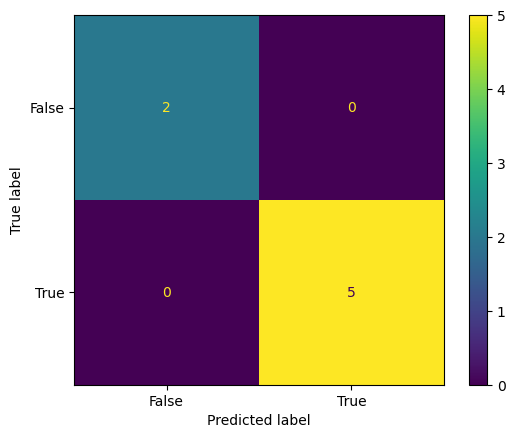

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Tree Depth: 3
done


In [234]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Train the Model
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
#Put the training data into the model 
model.fit(independent_variable_train,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("Tree Depth:", model.tree_.max_depth)

print("done")


Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 10 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
  (0, 1076)	0.03457635252605786
  (0, 951)	0.03457635252605786
  (0, 929)	0.059811064477847176
  (0, 365)	0.04443796417563056
  (0, 1629)	0.04137905778014964
  (0, 80)	0.059811064477847176
  (0, 576)	0.059811064477847176
  (0, 689)	0.059811064477847176
  (0, 181)	0.053008359223755394
  (0, 960)	0.03655246159063567
  (0, 357)	0.059811064477847176
  (0, 1622)	0.059811064477847176
  (0, 1399)	0.059811064477847176
  (0, 1991)	0.04818176303424142
  (0, 832)	0.053008359223755394
  (0, 755)	0.059811064477847176
  (0, 2261)	0.11962212895569435
  (0, 2143)	0.04137905778014964
  (0, 1036)	0.059811064477847

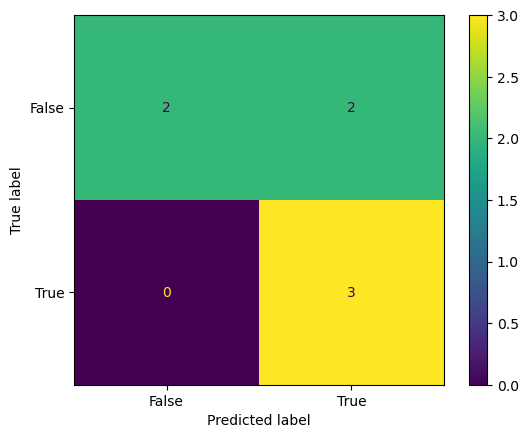

Accuracy:  0.7142857142857143
Precision:  0.6
Recall:  1.0
F1:  0.7499999999999999
done


In [245]:
# Using Cross validation and grid search


import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
from sklearn.metrics import precision_score


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)

print(independent_variable_train)

#Train the Model
from sklearn.tree import DecisionTreeClassifier 
basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
parameters = {'max_depth': [50, 85, 150, 192, 250, 500]}

#This is how we are creating a validation data set
#Use a small percentage of the train data for validation purposes
from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=2)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)



#Make predictions by using the optimized model
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("done")


#### Decision Tree - Single Prediction

In [244]:
# Using Cross validation and grid search


import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
from sklearn.metrics import precision_score


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_test = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
#independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_array)


#Train the Model
#from sklearn.tree import DecisionTreeClassifier 
#basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
#parameters = {'max_depth': [50, 85, 150, 192, 250, 500]}

#This is how we are creating a validation data set
#Use a small percentage of the train data for validation purposes
#from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
#grid_model = GridSearchCV(basemodel, parameters, cv=2)
#optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)



#Make predictions by using the optimized model
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))


print("done")


Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 7 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None


NotFittedError: The TF-IDF vectorizer is not fitted

In [269]:
# Using Cross validation and grid search


import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
from sklearn.metrics import precision_score


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

input_dataframe = input_dataframe.dropna()
print(input_dataframe.shape)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
#independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
#dependent_variable_test = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_test = input_dataframe['Code'] 


#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

#from sklearn.feature_extraction.text import TfidfVectorizer 
  
#vectorization = TfidfVectorizer() 
#independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_array)


#Train the Model
#from sklearn.tree import DecisionTreeClassifier 
#basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
#parameters = {'max_depth': [50, 85, 150, 192, 250, 500]}

#This is how we are creating a validation data set
#Use a small percentage of the train data for validation purposes
#from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
#grid_model = GridSearchCV(basemodel, parameters, cv=2)
#optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)

# print(independent_variable_array)

#Make predictions by using the optimized model
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
# print(predictions_dataframe)

print("Number of Predicted Values:", len(predicted_values))

print("Number of Actual Values:", len(dependent_variable_test))


print("done")


(1, 2)
Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None


ValueError: If using all scalar values, you must pass an index

In [270]:
# Using Cross validation and grid search


import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
from sklearn.metrics import precision_score


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

input_dataframe = input_dataframe.dropna()
print(input_dataframe.shape)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
#independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
#dependent_variable_test = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_test = input_dataframe['Code'] 


#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

#from sklearn.feature_extraction.text import TfidfVectorizer 
  
#vectorization = TfidfVectorizer() 
#independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_array)


#Train the Model
#from sklearn.tree import DecisionTreeClassifier 
#basemodel = DecisionTreeClassifier() 

#Let's search for the optimum tree depth
#parameters = {'max_depth': [50, 85, 150, 192, 250, 500]}

#This is how we are creating a validation data set
#Use a small percentage of the train data for validation purposes
#from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
#grid_model = GridSearchCV(basemodel, parameters, cv=2)
#optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)

# print(independent_variable_array)

#Make predictions by using the optimized model
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)

print("Number of Predicted Values:", len(predicted_values))

print("Number of Actual Values:", len(dependent_variable_test))


print("done")


(1, 2)
Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0
Number of Predicted Values: 1
Number of Actual Values: 1
done


### Decision Tree Summary

| Model                          | Accuracy | Precision | Recall | F1   |
|--------------------------------|----------|-----------|--------|------|
| Decision Tree                  | 1        | 1         | 1      | 1    |
| Decision Tree with CV and GridSearch | 0.714    | 0.6       | 1      | 0.75 |

Between the two decision tree models, while Decision Tree (normal) seems to be the better option having higher accuracy precision and F1 score, I believe that the second model with CV and GridSearch is more accurate. This is for two reasons. 

The first is because the first model relies on a 80-20 train-test split, whereas the CV uses iterative sampling and testing over the entire dataset. 

The second reason is because GridSearch is meant to optimize and tune parameters for the best model. Here, the optimized parameter has a max-depth of 192. While it might seem that the first model has better prediction, the second model is actually more optimized. Intuitively this makes sense because an accuracy of 100% is likely to involve some overfitting. Because the Optimized model does not have a very low accuracy score (less than 0.5), this model works reasonably well and this is supported with the following findings. 

When the predicting a new sample with GridSearch and CV, this correctly predicts that the test news is real news. 

## Random Forest

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 21 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              1                 1
1              0                 1
2              1                 1
3              0                 1
4              1                 1
5              0                 1
6              0                 1


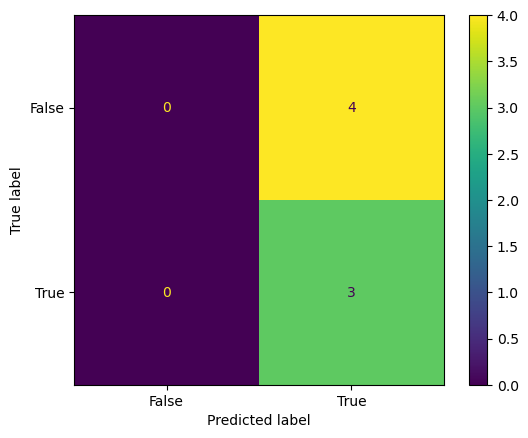

Accuracy:  0.42857142857142855
Precision:  0.42857142857142855
Recall:  1.0
F1:  0.6
Number of Trees: 100
done


In [275]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Train the Model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,random_state = 42) 
#Put the training data into the model 
model.fit(independent_variable_train,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("Number of Trees:", model.n_estimators)

print("done")


Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 9 to 18
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
Tuned hyperparameters (best parameters): {'max_depth': 2, 'n_estimators': 50}
   Actual Target  Predicted Target
0              1                 1
1              0                 1
2              0                 0
3              0                 1
4              0                 1
5              1                 1
6              0                 1


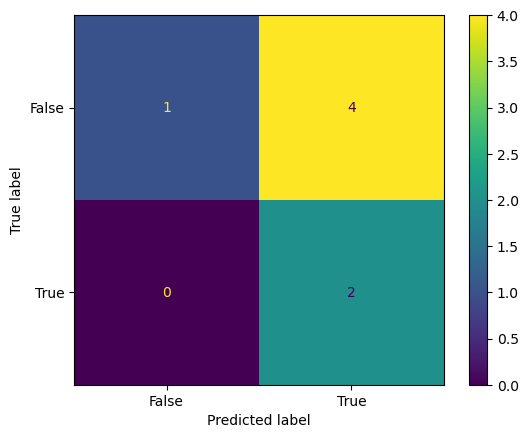

Accuracy:  0.42857142857142855
Precision:  0.3333333333333333
Recall:  1.0
F1:  0.5
done


In [286]:
# Random forest with grid search and CV

import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Train the Model
from sklearn.ensemble import RandomForestClassifier 
basemodel = RandomForestClassifier(n_estimators=100, random_state = 42) 

parameters = {'n_estimators': [15, 50, 75, 100, 125, 150, 300],'max_depth': [2, 5, 7, 9]}

from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=2)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#.best_params_ gives the best combination of tuned hyperparameters
print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)


print("done")



#### Random Forest - Single Test 

In [306]:


import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

#from sklearn.feature_extraction.text import TfidfVectorizer 
  
#vectorization = TfidfVectorizer() 
#independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_array)


#Train the Model
#from sklearn.ensemble import RandomForestClassifier 
#basemodel = RandomForestClassifier(n_estimators=100, random_state = 42) 

#parameters = {'n_estimators': [15, 50, 75, 100, 125, 150, 300],'max_depth': [2, 5, 7, 9]}

#from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
#grid_model = GridSearchCV(basemodel, parameters, cv=2)
#optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#.best_params_ gives the best combination of tuned hyperparameters
#print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)



#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)


predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
print("done")



Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 1
done


### Random Forest Summary 

| Model                           | Accuracy | Precision | Recall | F1 Score |
|-------------------------------|-----------|--------|----------|----------|
| Random Forest                 | 0.43      | 0.43   | 1        | 0.6      |
| Random Forest with CV/GridSearch | 0.43      | 0.3    | 1        | 0.5      |

The optimized model uses the following parameter {'max_depth': 2, 'n_estimators': 50}, as found through GridSearch. 

Between the two models, Random Forest without CV or GridSearch seems to be optimal. This is because the accuracy score and precision score for both are the same. The only difference is Recall and F1. 

[Recall](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) captures how much of the actual positives is captured in this model. For this score, the regular RF achieves a higher score. 

While the first model does seem to be a better model, it is more accurate to say that the two models are quite comparable. The deviation between the two is most represented in the F1 score.  The [F1 score](https://www.v7labs.com/blog/f1-score-guide) measures the combination of precision(ratio of true positives to total predicted positives) and recall. This score accounts for any tradoffs from optimizing one or the other factors. Here in this score, Random Forest without CV/Gridsearch also outperforms the other model but only by 0.1. 

When testing with a single sample, the predicted value is 1, indicating fake news when it is actually real news (value of 0). This makes sense because the accuracy and precision of both models are both below 0.5 with F1 just hovering around 50-50. 


## SVM

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 28 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              0                 1
1              0                 1
2              0                 1
3              0                 1
4              1                 1
5              0                 1
6              0                 1


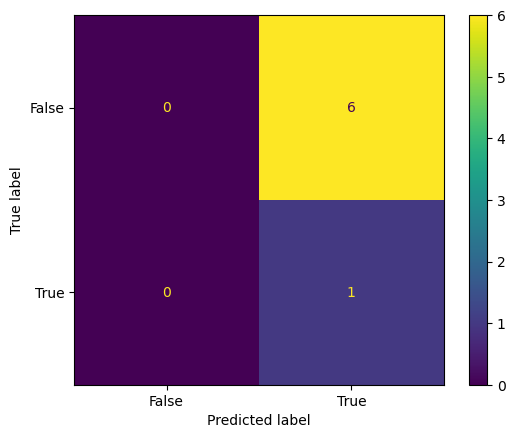

Accuracy:  0.14285714285714285
Precision:  0.14285714285714285
Recall:  1.0
F1:  0.25
done


In [229]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
from sklearn.metrics import precision_score


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Import the library to build the model
from sklearn import svm
#Build the model
model = svm.SVC(kernel='rbf')
#Train the Model
model.fit(independent_variable_train,dependent_variable_train.ravel())


#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("done")


Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 10 to 18
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
Tuned hyperparameters (best parameters): {'kernel': 'linear'}
   Actual Target  Predicted Target
0              0                 1
1              1                 1
2              1                 1
3              1                 1
4              1                 1
5              1                 1
6              0                 1


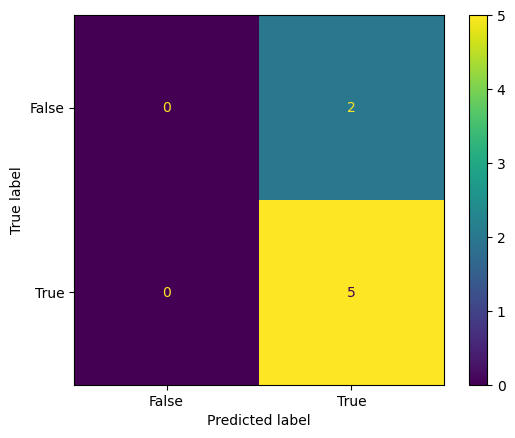

Accuracy:  0.7142857142857143
Precision:  0.7142857142857143
Recall:  1.0
F1:  0.8333333333333333
done


In [230]:
# SVC Optimized to find best kernel 

import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Import the library to build the model
from sklearn import svm
#Build the model
basemodel = svm.SVC(kernel='rbf')

#precomputed kernel gives error and excluded below
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=2)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#.best_params_ gives the best combination of tuned hyperparameters
print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("done")


#### Single Sample Test

In [308]:
# SVC Optimized to find best kernel 

import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy




################################## Training previous model, copied pasted

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
#print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
#print("\n")

#Are there empty cells in the input data file?
#print("\nAre there empty cells in the dataset?\n")
#print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)


#Import the library to build the model
from sklearn import svm
#Build the model
basemodel = svm.SVC(kernel='rbf')

#precomputed kernel gives error and excluded below
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
grid_model = GridSearchCV(basemodel, parameters, cv=2)
optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())





#################
#################







#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

#from sklearn.feature_extraction.text import TfidfVectorizer 
  
#vectorization = TfidfVectorizer() 
#independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_array)


#Import the library to build the model
#from sklearn import svm
#Build the model
#basemodel = svm.SVC(kernel='rbf')

#precomputed kernel gives error and excluded below
#parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

#from sklearn.model_selection import GridSearchCV

# cv means Cross validation industry standard value here is 10
#I put 5 below because 10 takes longer time to run
#grid_model = GridSearchCV(basemodel, parameters, cv=2)
#optimizedmodel = grid_model.fit(independent_variable_train, dependent_variable_train.ravel())

#.best_params_ gives the best combination of tuned hyperparameters
#print("Tuned hyperparameters (best parameters):", optimizedmodel.best_params_)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)


#Make predictions based on test data which we have not used yet
predicted_values = optimizedmodel.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)

print("done")


Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0
done


### SVM Summary 

| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|-----------|--------|----------|----------|
| SVM                              | 0.14      | 0.14   | 1        | 0.25     |
| SVM with CV/GridSearch          | 0.71      | 0.71   | 1        | 0.83     |


In the SVM model with GridSearch, the tuned hyperparameters use {'kernel': 'linear'}. 

A comparison of the two models shows that the SVM optimized with CV and GridSearch outperforms the other model in all aspects, with a tie for recall. This resonates with the test finding, where the actual target is a real news and the prediction is also real news. 

## Word2Vec

### Decision Tree - Word2Vec

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              1                 0
1              1                 1
2              0                 0
3              0                 0
4              1                 0
5              0                 0
6              1                 1


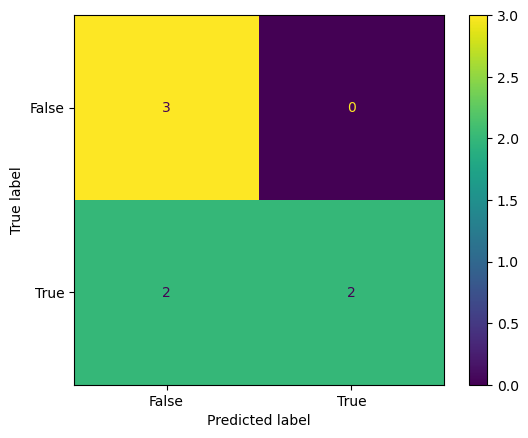

Accuracy:  0.7142857142857143
Precision:  1.0
Recall:  0.5
F1:  0.6666666666666666
done


In [324]:

#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381 
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
#pip3 install gensim
import gensim
from sklearn.metrics import confusion_matrix

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
#Put the training data into the model 
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("done")



#### One Sample Test

In [323]:

#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381 
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
#pip3 install gensim
import gensim
from sklearn.metrics import confusion_matrix


########### Previous model, copied pasted

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
#print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
#print("\n")

#Are there empty cells in the input data file?
#print("\nAre there empty cells in the dataset?\n")
#print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() 
#Put the training data into the model 
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())
############






#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

#shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

#w2v_model = gensim.models.Word2Vec(dependent_variable_array,vector_size=100, window=5, min_count=2)
#w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
#words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
#from sklearn.tree import DecisionTreeClassifier 
#model = DecisionTreeClassifier() 
#Put the training data into the model 
#model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
print("done")



Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0
done


### Decision Tree - Word2Vec Summary

| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| Decision Tree Word2Vec          | 0.71        | 1         | 0.5      | 0.66        |

While this model could still be improved considering a 70% accuracy and 66% F1 score, it seems that this model is reasonably good at predicting. In our one sample test, it accurately predicted that the news was real (0). 

### Random Forest - Word2Vec

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 2 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0
1              1                 0
2              1                 0
3              1                 0
4              0                 0
5              1                 0
6              1                 1


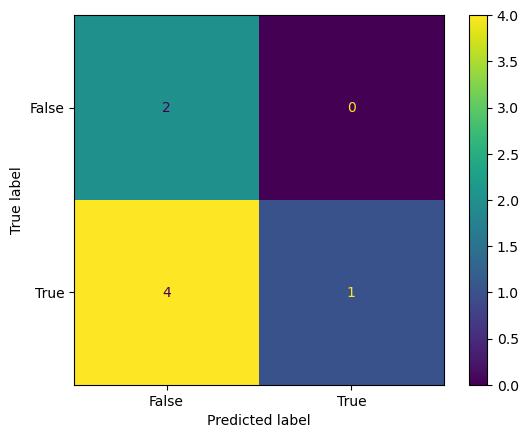

Accuracy:  0.42857142857142855
Precision:  1.0
Recall:  0.2
F1:  0.33333333333333337
Number of Trees: 100
done


In [321]:

#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381 
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
#pip3 install gensim
import gensim
from sklearn.metrics import confusion_matrix

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,random_state = 42) 
#Put the training data into the model 
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("Number of Trees:", model.n_estimators)

print("done")



#### Single Sample Test

In [328]:
###########

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
#print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
#print("\n")

#Are there empty cells in the input data file?
#print("\nAre there empty cells in the dataset?\n")
#print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

# print("Dependent Variable Training Data:", dependent_variable_train)

# print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,random_state = 42) 
#Put the training data into the model 
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())
########################



















#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

# shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

#w2v_model = gensim.models.Word2Vec(dependent_variable_train,vector_size=100, window=5, min_count=2)
#w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
#words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array])
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array])

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Train the Model
#from sklearn.ensemble import RandomForestClassifier 
#model = RandomForestClassifier(n_estimators=100,random_state = 42) 
#Put the training data into the model 
#model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())

#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)









Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0


### Random Forest Word2Vec Summary

| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| Random Forest Word2Vec          | 0.43     |1       | 0.2    | 0.33     |

One score that stands out here is the high precision score compared to the other scores. [Precision](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall) measures the ratio of True Positives to Predicted Positives. A closer look at our test data set shows that this might be due to the limited sample set where (TP = 1 / TP + FP(=0)) = 1/1 = 1. Discounting this score, the other scores are surprisingly underperforming. 



| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| Random Forest with CV/GridSearch      | 0.43     |0.43       | 1   | 0.5|

Compared to our earlier findings with Random Forest using TF IDF, we have similar findings. This shows that random forest might not be a good model overall. This may have to do with the need for more [trees](https://builtin.com/data-science/random-forest-algorithm#how). The limited sample size could be a big factor in why this ensemble method is not working. However, it does seem to have some predictive power. Our one-sample test does support that there may be some use for this model since it accurate predicts that the real news is real (0). 


### SVM - Word2Vec

Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 24 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
   Actual Target  Predicted Target
0              1                 1
1              0                 1
2              1                 1
3              0                 1
4              0                 1
5              0                 1
6              1                 1


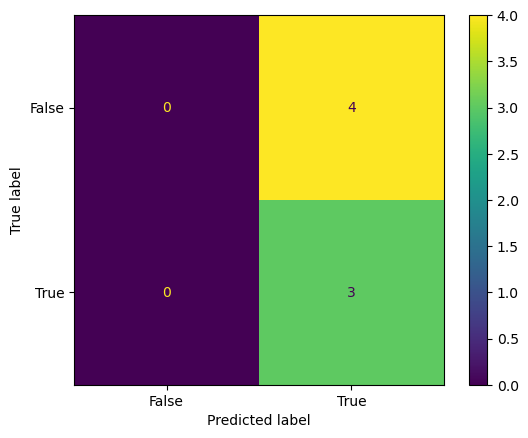

Accuracy:  0.42857142857142855
Precision:  0.42857142857142855
Recall:  1.0
F1:  0.6
done


In [326]:

#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381 
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
#pip3 install gensim
import gensim
from sklearn.metrics import confusion_matrix

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Import the library to build the model
from sklearn import svm
#Build the model
model = svm.SVC(kernel='rbf')
#Train the Model
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())



#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)


print("done")



#### Single Sample Test

In [332]:

####################

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
#print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
#print("\n")

#Are there empty cells in the input data file?
#print("\nAre there empty cells in the dataset?\n")
#print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_train], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_test], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))
        
independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))

# Are our sentence vector lengths consistent?
#for i, v in enumerate(independent_variable_train_vect):
#    print(len(independent_variable_train[i]), len(v))

#Import the library to build the model
from sklearn import svm
#Build the model
model = svm.SVC(kernel='rbf')
#Train the Model
model.fit(independent_variable_train_vect_avg,dependent_variable_train.ravel())


########################

#https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381 
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
import numpy
#pip3 install gensim
import gensim
from sklearn.metrics import confusion_matrix

#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

#shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

#from sklearn.model_selection import train_test_split

#dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
# Train the word2vec model
#size - size of the vectors we want
#window - number words before and after the focus word that it’ll consider as context for the word
#min_count - the number of times a word must appear in our corpus in order to create a word vector

#w2v_model = gensim.models.Word2Vec(independent_variable_train,vector_size=100, window=5, min_count=2)
#w2v_model.wv.index_to_key
#Generate aggregated sentence vectors based on the word vectors for each word in the sentence
#words = set(w2v_model.wv.index_to_key)

independent_variable_train_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array], dtype=object)
independent_variable_test_vect = numpy.array([numpy.array([w2v_model.wv[i] for i in ls if i in words]) for ls in independent_variable_array], dtype=object)

# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
independent_variable_train_vect_avg = []
for v in independent_variable_train_vect:
    if v.size:
        independent_variable_train_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_train_vect_avg.append(numpy.zeros(100, dtype=float))


independent_variable_test_vect_avg = []
for v in independent_variable_test_vect:
    if v.size:
        independent_variable_test_vect_avg.append(v.mean(axis=0))
    else:
        independent_variable_test_vect_avg.append(numpy.zeros(100, dtype=float))



#Make predictions based on test data which we have not used yet
predicted_values = model.predict(independent_variable_test_vect_avg)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()},index=[0])
print(predictions_dataframe)


print("done")


Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 1
done


### SVM Word2Vec Summary

| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| SVM Word2Vec        | 0.43     | 0.43      | 1      | 0.6      |

Similar to Random Forest, this model does not have good scores either. The high precision is primary due to the absence of false positives, which leads to a TP:TP ratio of 1. While the F1 Score is slightly above 0.5, it is not high enough to be considered a relatively effective model. This can be substantiated with our one-sample test, which this model fails to predict a real news (Actual Target = 0). 

| Model                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| SVM with CV/GridSearch        | 0.71     | 0.71      | 1      | 0.83      |

Contrasted with our previous SVM model using TF IDF, this model underperforms and fails to predict our sample. This might be due to the way [Word2Vec works.](https://swimm.io/learn/large-language-models/what-is-word2vec-and-how-does-it-work) TF IDF is simple and [computationally cheap](https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/). Word2Vec requires further processing that includes additional conversion and put through in a neural network. While this may have high efficacy in larger sample sets, the limited sample size may work against it. 

## KNN Model

In [345]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pylab as plt


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)

# Train the model

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(independent_variable_train, dependent_variable_train.ravel())
    results.append({
        'k': k,
        'score': accuracy_score(dependent_variable_test.ravel(), knn.predict(independent_variable_test))
        # accuracy_score() or recall_score()
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results.sort_values(by='score', ascending=False)




Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 14 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None


C:\Users\Brian\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Brian\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,k,score
0,1,0.857143
2,3,0.714286
1,2,0.571429
3,4,0.571429
4,5,0.571429
6,7,0.571429
7,8,0.571429
8,9,0.571429
9,10,0.571429
10,11,0.571429


Number of Rows and Columns: (32, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 21 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  32 non-null     object
 1   Code       32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None
     k     score
1    2  0.857143
9   10  0.857143
10  11  0.857143
11  12  0.857143
13  14  0.857143
0    1  0.714286
2    3  0.714286
3    4  0.714286
4    5  0.714286
5    6  0.714286
12  13  0.714286
6    7  0.571429
7    8  0.571429
8    9  0.571429
   Actual Target  Predicted Target
0              1                 1
1              1                 1
2              0                 0
3              1                 0
4              0                 0
5              1                 1
6              0                 0


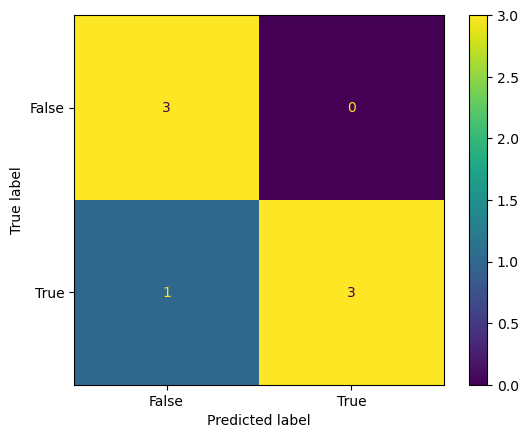

Accuracy:  0.8571428571428571
Precision:  1.0
Recall:  0.75
F1:  0.8571428571428571
done


In [351]:
import pandas
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import precision_score
import numpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import matplotlib.pylab as plt


###
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
##


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)

# Train the model

# Train a classifier for different values of k, Finding optimal k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(independent_variable_train, dependent_variable_train.ravel())
    results.append({
        'k': k,
        'score': accuracy_score(dependent_variable_test.ravel(), knn.predict(independent_variable_test))
        # accuracy_score() or recall_score()
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results.sort_values(by='score', ascending=False))

###

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X=independent_variable_train, y=dependent_variable_train.ravel())

#Make predictions by using the optimized model
predicted_values = knn.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_test.squeeze(), 'Predicted Target': predicted_values.squeeze()})
print(predictions_dataframe)

#print("Number of Predicted Values:", len(predicted_values))

#print("Number of Actual Values:", len(dependent_variable_test))
  
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
confusionmatrix = metrics.confusion_matrix(dependent_variable_test.squeeze(), predicted_values.squeeze()) 
  
confusionmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, 
                                            display_labels=[False, True]) 
  
confusionmatrix_display.plot() 
plt.show() 

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Calculate Accuracy
accuracy = accuracy_score(dependent_variable_test, predicted_values)
print("Accuracy: ", accuracy)

#Calculate Precision
precision = precision_score(dependent_variable_test, predicted_values)
print("Precision: ", precision)

#Calculate Recall
recall = recall_score(dependent_variable_test, predicted_values)
print("Recall: ", recall)

#Calculate F1
f1 = f1_score(dependent_variable_test, predicted_values)
print("F1: ", f1)

print("done")




### New Data Test

In [355]:
####### Copied from above

###
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
##


#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('cleanedtext2.csv', header=[0], index_col=0)

shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
#print("Number of Rows and Columns:", shuffled_inputdata_dataframe.shape)
#print("\n")

#Are there empty cells in the input data file?
#print("\nAre there empty cells in the dataset?\n")
#print(shuffled_inputdata_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = shuffled_inputdata_dataframe['CleanText'].values
dependent_variable_array = shuffled_inputdata_dataframe['Code'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split

dependent_variable_train, dependent_variable_test, independent_variable_train,independent_variable_test  = train_test_split(dependent_variable_array, independent_variable_array, test_size = 0.2, random_state = 42)

#print("Dependent Variable Training Data:", dependent_variable_train)

#print("Independent Variable Training Data:", independent_variable_train)

#Converting text into Vectors
#Text vectorization allows the model to understand the text

from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
independent_variable_train = vectorization.fit_transform(independent_variable_train) 
independent_variable_test = vectorization.transform(independent_variable_test)

# Train the model

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X=independent_variable_train, y=dependent_variable_train.ravel())
##########







#header is my first row in the csv file that is why hesder is 0 below
input_dataframe = pandas.read_csv('Test.csv', header=[0], index_col=0)

#shuffled_inputdata_dataframe = input_dataframe.sample(frac=1)

#check to see is shuffle work
#print(shuffled_inputdata_dataframe.head(n=20))

#Find out how many rows and columns in the dataset
print("Number of Rows and Columns:", input_dataframe.shape)
print("\n")

#Are there empty cells in the input data file?
print("\nAre there empty cells in the dataset?\n")
print(input_dataframe.info())

#Declare dependent and independent variables for the model
independent_variable_array = input_dataframe['CleanText'].values
dependent_variable_array = input_dataframe['Code'].values.reshape(-1, 1)

independent_variable_test = vectorization.transform(independent_variable_array)



#Make predictions by using the optimized model
predicted_values = knn.predict(independent_variable_test)

predictions_dataframe = pandas.DataFrame({'Actual Target': dependent_variable_array.squeeze(), 'Predicted Target': predicted_values.squeeze()}, index=[0])
print(predictions_dataframe)



Number of Rows and Columns: (1, 2)



Are there empty cells in the dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CleanText  1 non-null      object
 1   Code       1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes
None
   Actual Target  Predicted Target
0              0                 0


### KNN Classifier Summary

| Model | Accuracy | Precision | Recall | F1 Score |
|-------|----------|-----------|--------|----------|
| KNN   | 0.86     | 1         | 0.75   | 0.86     |

For the KNN Classifier model, we used an optimized k-value of nearest-neighbor = 14. Using this optimized value, we have the resulting scores shown above. This shows a lot of promise as all the scores are relatively high. This is further supported in our new data test, where we run a new data sample for the prediction. Here, it accurately predicts that the news article is real news. 

## Models Summary


| Model                         | Accuracy | Precision | Recall | F1  | One-Sample Test |
|-------------------------------|----------|-----------|--------|-----|-----------------|
| Decision Tree with CV and GridSearch | 0.714    | 0.6       | 1      | 0.75 | Pass            |
| Random Forest with CV/GridSearch     | 0.43     | 0.3       | 1      | 0.5  | Fail            |
| SVM with CV/GridSearch               | 0.71     | 0.71      | 1      | 0.83 | Pass            |
| Decision Tree Word2Vec               | 0.71     | 1         | 0.5    | 0.66 | Pass            |
| Random Forest Word2Vec               | 0.43     | 1         | 0.2    | 0.33 | Pass            |
| SVM Word2Vec                         | 0.43     | 0.43      | 1      | 0.6  | Fail            |
| KNN   | 0.86     | 1         | 0.75   | 0.86     | Pass|


Above is the summary of the findings between all the models. 

In selecting the best model, KNN Classifier seems to be the best tool. This is because it has the highest accuracy, precision and F1 scores and second best for recall. Because it has high marks on all the different accuracy measures, it is a reliable tool. 

In selecting the second best model, the Decision Tree would be most adept for fake news. While SVM and Random Forest may be effective choices as well and have instances of high Accuracy, Precision, Recall, or F1 scores, theses two models may fail depending on whether or not Word2Vec is used or TF-IDF. Because the choice of text vectorization method may change in the future, Decision Trees would be a safer choice because they passed the one-sample test in both vectorization methods. Each of the decision tree models also have reasonably good accuracy and and precision scores. 

While this summary does offer some insight into which model would be effective, it does have its limitations. For one, the sample size for this study was not expansive enough to build a good model. This may lead to limitations with Random Forest and SVM, which may be superior choice in Big Data. If this research is replicated again in the future, the sample size should be expanded considerably. 